## Required Libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import statsmodels.formula.api as smf

## Loading the Data

In [ ]:
merged_data = pd.read_csv('data/cleaned/merged_eu_health_data.csv')
# merged_data.head()

## Research questions 

*Is there a statistically significant relationship between health spending and life expectancy in EU countries over time?*

### Inspect the Data 

In [31]:
merged_data.info()
merged_data.isnull().sum()
merged_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152307 entries, 0 to 152306
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         152307 non-null  int64  
 1   Country Code       152307 non-null  object 
 2   Country Name       152307 non-null  object 
 3   Year               152307 non-null  int64  
 4   Spending Unit      152307 non-null  object 
 5   Financing Code     152307 non-null  object 
 6   Category           152307 non-null  object 
 7   Spending           152307 non-null  float64
 8   Gender             152307 non-null  object 
 9   Age Class          152307 non-null  object 
 10  Life Expectancy    152307 non-null  float64
 11  Type of Mortality  152307 non-null  object 
 12  Diseas             152307 non-null  object 
 13  Mortality Rate     152307 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 16.3+ MB


,Unnamed: 0,Year,Spending,Life Expectancy,Mortality Rate
count,152307.000000,152307.000000,152307.000000,152307.000000,152307.000000
mean,76153.000000,2017.198960,547.863881,78.390890,197.180124
std,43967.388062,3.094793,1262.208507,4.049032,149.802032
min,0.000000,2012.000000,0.000000,64.100000,33.120000
25%,38076.500000,2015.000000,0.000000,76.300000,90.170000
50%,76153.000000,2017.000000,47.290000,79.100000,158.310000
75%,114229.500000,2020.000000,471.660000,81.300000,240.900000
max,152306.000000,2022.000000,10374.050000,86.700000,1000.630000


### Visual Exploration 

Visualize the potential correlation:

<Figure size 1000x600 with 0 Axes>

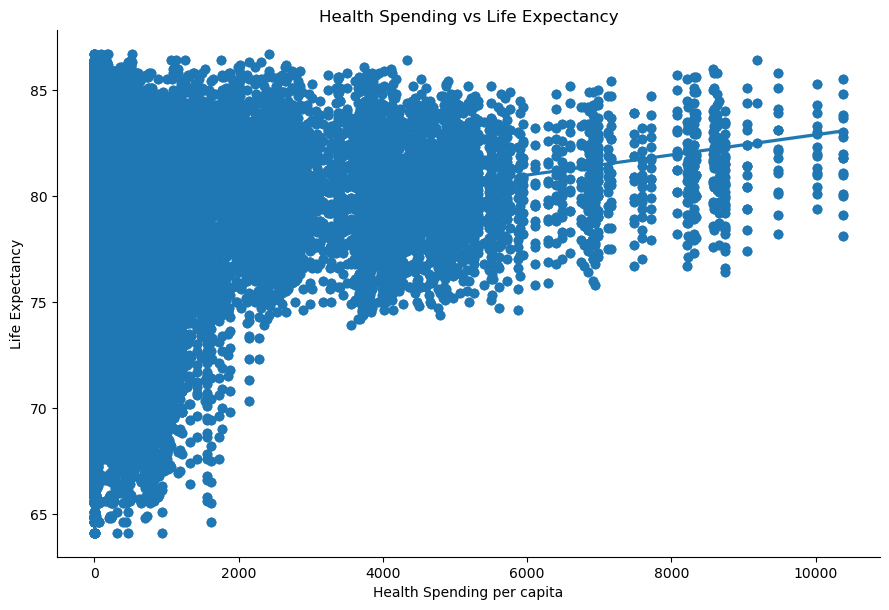

In [32]:
## regression Line

plt.figure(figsize=(10, 6))
sns.lmplot(data=merged_data, x= 'Spending', y='Life Expectancy', height=6, aspect=1.5)
plt.title('Health Spending vs Life Expectancy')
plt.xlabel('Health Spending per capita')
plt.ylabel('Life Expectancy')
plt.show()

### Correlation Analysis
 Pearson correlation for linear trends

In [33]:
corr = merged_data[['Spending', 'Life Expectancy']].corr
print(corr)


<bound method DataFrame.corr of         Spending  Life Expectancy
0        1678.79             82.8
1        1678.79             82.8
2        1678.79             82.8
3        1678.79             81.9
4        1678.79             81.9
...          ...              ...
152302    998.98             73.2
152303    998.98             73.2
152304    998.98             76.7
152305    998.98             76.7
152306    998.98             76.7

[152307 rows x 2 columns]>


### Linear Regression

In [34]:
reg_data = merged_data[['Spending', 'Life Expectancy']].dropna()

## Defining the dependent and independent variables
x = reg_data['Spending']
y = reg_data['Life Expectancy']


x = sm.add_constant(x)    # Adding Constant to the model

reg_model = sm.OLS(y, x).fit()

reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3421.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:06:50   Log-Likelihood:            -4.2742e+05
No. Observations:              152307   AIC:                         8.548e+05
Df Residuals:                  152305   BIC:                         8.549e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1304      0.011   6985.043      0.000      78.108      78.152
Spending       0.0005   8.13e-06     58.489      0.000       0.000       0.000
==============================================================================
Omnibus:                    12070.095   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15130.003
Skew:                          -0.759   Prob(JB):                         0.00
Kurtosis:                       3.278   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualize the relations and check the Distribution and Outliers

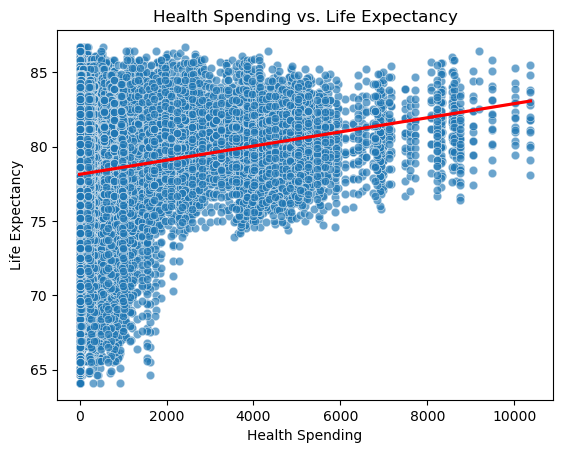

In [35]:
sns.scatterplot(data= merged_data, x='Spending', y = 'Life Expectancy', alpha=0.3)
sns.regplot(data=merged_data, x='Spending', y='Life Expectancy', scatter=False, color='red')
plt.title('Health Spending vs. Life Expectancy')
plt.xlabel('Health Spending')
plt.show()

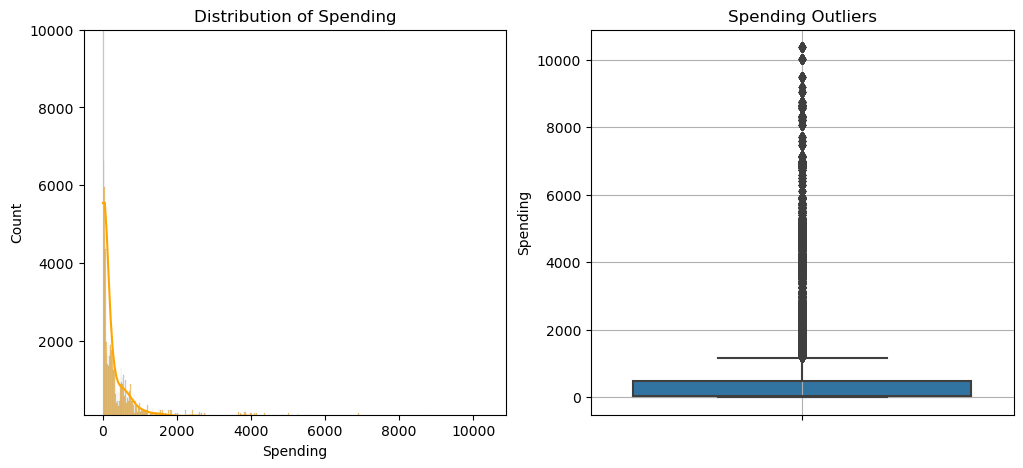

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(merged_data['Spending'], kde=True, ax=axes[0], color='Orange')
axes[0].set_title('Distribution of Spending')
axes[1].grid(True)
axes[0].set_ylim(100, 10000)

sns.boxplot(y=merged_data['Spending'], ax=axes[1])
axes[1].set_title('Spending Outliers')
axes[1].grid(True)
plt.show()

### Ckeck for Correlation and Multicollinearity

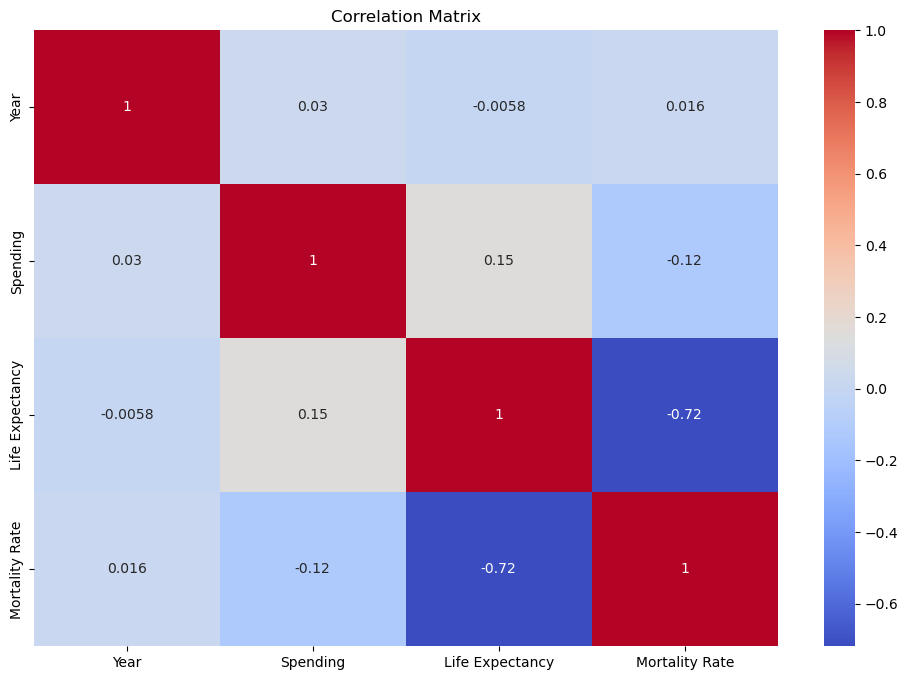

In [37]:
merged_data.drop(columns=['Unnamed: 0'], inplace=True)
corr = merged_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

##  Detect multicollinearity (**Variance Inflation Factor (VIF)**)

In [38]:
# Define more predictors
x = merged_data[['Spending', 'Year', 'Age Class', 'Gender']]

# Turn the categorical variables into dummy variables
x = pd.get_dummies(x, drop_first=True).astype(int)
x = x.dropna()


# Calculate VIF
vif = pd.DataFrame()
vif['features'] = x.columns
vif['VIF'] =  [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

                     features       VIF
0                    Spending  0.002147
1                        Year  0.014822
2           Age Class_2 years  1.999988
3           Age Class_3 years  1.999988
4           Age Class_4 years  1.999988
5  Age Class_Less than 1 year  2.003848
6                    Gender_M  1.999993
7                    Gender_T  1.999993


## Fit the Multivariates OLS model

No multicollinearity found in Spending variable, and a very low multicollinearity at an acceptable rate in the other predictors. 

In [39]:

# Define the independent variables and the target
X = pd.get_dummies(merged_data[['Spending', 'Year', 'Age Class', 'Gender']], drop_first=True).astype(int) # use drop_first to avoid dummy variable trap

X = sm.add_constant(X)  # add constant for intercept
y = merged_data['Life Expectancy']

# Drop missing values (if any)
X = X.loc[y.notnull()]
y = y.loc[y.notnull()]

# Fit OLS regression
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.439      
Dependent Variable:      Life Expectancy     AIC:                   770252.5068
Date:                    2025-08-11 11:07    BIC:                   770341.9097
No. Observations:        152307              Log-Likelihood:        -3.8512e+05
Df Model:                8                   F-statistic:           1.489e+04  
Df Residuals:            152298              Prob (F-statistic):    0.00       
R-squared:               0.439               Scale:                 9.2009     
-------------------------------------------------------------------------------
                            Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------------
const                      110.2010   5.0683   21.7430 0.0000 100.2672 120.1349
Spending                     0.0005   0.0000   77.2191 0.0000   

In [ ]:
# Get summary as DataFrame
summary = model.summary2().tables[1].reset_index()
summary.columns = ['Variable', 'Coefficient', 'StdErr', 't', 'P_Value', 'Lower_CI', 'Upper_CI']

# Add 'Significant' flag
summary['Significant'] = np.where(summary['P_Value'] < 0.05, 'Yes', 'No')
# summary

# Optional categorization
def categorize(var):
    if 'Gender' in var:
        return 'Gender'
    elif 'Age Class' in var:
        return 'Age Class'
    elif 'Spending' in var or 'Healthcare' in var:
        return 'HealthCare Spending'
    elif 'Year' in var:
        return 'Time'
    elif var == 'const':
        return 'Intercept'
    else:
        return 'Other'

summary['Category'] = summary['Variable'].apply(categorize)



# Export for Tableau
summary.to_csv("reports/multi_regression_results.csv", index=False)


#### Advancing Statistical Analysis

In [41]:
# make the data smaller
data_small = merged_data[['Life Expectancy','Year', 'Age Class', 'Gender', 'Spending']].copy()
data_small.rename(columns={'Life Expectancy' : 'life_expectancy', 'Age Class': 'age_class'}, inplace=True)

data_small = data_small.dropna()

# Convert large float and integer number to smaller version to save memory
data_small['life_expectancy'] = pd.to_numeric(data_small['life_expectancy'], downcast='float')
data_small['Spending'] = pd.to_numeric(data_small['Spending'], downcast='float')
data_small['Year'] = pd.to_numeric(data_small['Year'], downcast='integer')
# data_small['age_class'] = pd.to_numeric(data_small['age_class'], downcast='integer')

#encode gender
data_small['gender_encoded'] = data_small['Gender'].map({'M': 0, 'F': 1, 'T':2})
data_small['age_encoded'] = data_small['age_class'].map({'Less than 1 year': 0, '1 year':1, '2 years': 2, '3 years':3, '4 years':4})

# create the interaction term    
data_small['gender_spending'] = data_small['gender_encoded'] * data_small['Spending']
data_small['age_year'] = data_small['Year'] * data_small['age_class']
data_small['age_spending'] = data_small['age_encoded'] * data_small['Spending']
data_small['year_spending'] = data_small['Year'] * data_small['Spending']


In [27]:
model2 = smf.ols('life_expectancy ~ Year + age_class + Gender + Spending + gender_spending ', data=data_small).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 1.325e+04
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:02:32   Log-Likelihood:            -3.8507e+05
No. Observations:              152307   AIC:                         7.702e+05
Df Residuals:                  152297   BIC:                         7.703e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       110.1977      5.067     21.749      0.000     100.267     120.129
age_class[T.2 years]             -0.9818      0.025    -39.941      0.000      -1.030      -0.934
age_class[T.3 years]             -1.9699      0.025    -80.142      0.000      -2.018      -1.922
age_class[T.4 years]             -2.9596      0.025   -120.403      0.000      -3.008      -2.911
age_class[T.Less than 1 year]     0.7418      0.025     30.209      0.000       0.694       0.790
Gender[T.M]                      -5.5553      0.019   -285.243      0.000      -5.593      -5.517
Gender[T.T]                      -2.6827      0.019   -137.745      0.000      -2.721      -2.644
Year                             -0.0140      0.003     -5.583      0.000      -0.019      -0.009
Spending                          0.0005   9.74e-06     56.426      0.000       0.001       0.001
gender_spending               -7.362e-05   7.54e-06     -9.765      0.000   -8.84e-05   -5.88e-05
==============================================================================
Omnibus:                    14230.839   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18252.556
Skew:                          -0.839   Prob(JB):                         0.00
Kurtosis:                       2.755   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Regression Results – Base + Interaction Term

**Key Findings:**

R² = 0.439 → 43.9% of life expectancy variation is explained by the model.

Gender (Male) is associated with -5.55 years lower life expectancy, controlling for other factors.

Spending has a small but statistically significant positive relationship with life expectancy.

The Gender × Spending interaction term is negative, suggesting that spending benefits are smaller for some genders.

In [ ]:

reg_results = pd.DataFrame({
    "Variable": model2.params.index,
    "Coefficient": model2.params.values,
    "Std. Error": model2.bse.values,
    "p-value": model2.pvalues.values,
    "CI Lower": model2.conf_int()[0].values,
    "CI Upper": model2.conf_int()[1].values
})

reg_results.to_csv("/reports/regression_results_model2.csv", index=False)
# reg_results


,Variable,Coefficient,Std. Error,p-value,CI Lower,CI Upper
0,Intercept,110.197738,5.066779,1.018595e-104,100.266955,120.128522
1,age_class[T.2 years],-0.981776,0.024580,0.000000e+00,-1.029953,-0.933599
2,age_class[T.3 years],-1.969909,0.024580,0.000000e+00,-2.018086,-1.921732
3,age_class[T.4 years],-2.959551,0.024580,0.000000e+00,-3.007728,-2.911374
4,age_class[T.Less than 1 year],0.741844,0.024557,7.006307e-200,0.693713,0.789975
5,Gender[T.M],-5.555285,0.019476,0.000000e+00,-5.593457,-5.517113
6,Gender[T.T],-2.682664,0.019476,0.000000e+00,-2.720836,-2.644492
7,Year,-0.014024,0.002512,2.365990e-08,-0.018947,-0.009101
8,Spending,0.000549,0.000010,0.000000e+00,0.000530,0.000568
9,gender_spending,-0.000074,0.000008,1.616812e-22,-0.000088,-0.000059
